# NLP on South Carolina Food Reviews

The goal of this notebook is to do some rudimentary NLP on Reviews on South Carolina

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import spacy
import itertools as it
%matplotlib inline 
import warnings
warnings.simplefilter(action='ignore')

# NLP imports 
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from gensim import models, corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from collections import Counter
from langdetect import detect
from collections import Counter
from textblob import TextBlob
import pyLDAvis.gensim

In [100]:
import matplotlib.patches as mpatches
import pyLDAvis.gensim
pyLDAvis.enable_notebook() # in order for our visual to show up

## Inspecting the Data

In [6]:
data = pd.read_csv("/home/schubert/DSI/capstone_project/eda_notebooks/food_reviews_sc")

In [7]:
data.head(50)

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,name,...,address,city,state,postal_code,latitude,longitude,review_count,is_open,categories,avg_stars
0,-6e0liTvH5EoB4HuncuQgA,TgDVK5GGEVWqIQB1klOwOQ,Ow07iTOW_JUer07MWNhazg,5,2017-09-02,My husband and I happened to drive by BIG FOOD...,0,0,0,"""Small Bar Fort Mill""",...,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
1,-6e0liTvH5EoB4HuncuQgA,WsnsRDe7Ywl5FC7bALCBMA,nFS3GfDeOOzg-bXKuNNHsA,5,2017-08-01,First time great food and service will be goin...,0,0,0,"""Small Bar Fort Mill""",...,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
2,-6e0liTvH5EoB4HuncuQgA,8gkZ2V9YzsM9A3r6Lj9zrQ,M3ncFIlEfaSdSpoiMINwBA,4,2017-06-21,It's a bar. It's small. It's Small Bar! It's c...,1,1,1,"""Small Bar Fort Mill""",...,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
3,-6e0liTvH5EoB4HuncuQgA,UyD3TRVYYMCynpkBuR9CcQ,T81BRLNvCpRkgVtYyabImQ,4,2017-09-12,Great little bar in Fort Mill. We went for lun...,0,0,0,"""Small Bar Fort Mill""",...,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
4,-6e0liTvH5EoB4HuncuQgA,eAsxdJilerKbjmVd2FkDVQ,QKm7NuvVMmvWHKmW7blABg,5,2017-06-22,Small Bar is great! Super cold beer and the p...,0,0,1,"""Small Bar Fort Mill""",...,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
5,-6e0liTvH5EoB4HuncuQgA,hqE3shecmEutpV92IY9dZQ,9RIECSrcR1b_JgqQxe8ZcQ,5,2017-11-05,"I love this place, it just feels right. Excell...",0,0,0,"""Small Bar Fort Mill""",...,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
6,-6e0liTvH5EoB4HuncuQgA,clffFSUbDa_ZCdqrdO5FpQ,3kRvuw-shQgCbVdamuXinw,1,2017-12-01,Have gone to one in Stallings a few times and ...,0,0,0,"""Small Bar Fort Mill""",...,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
7,-QKKkUEQhDVndxZDT9SovQ,GSAtU63AR_LT00m0JQbaVw,IZXnSMdOkVdFH-mw6zQBbA,3,2012-05-21,"Visited Los Aztecas for lunch today, just to t...",3,0,0,"""Los Aztecas""",...,"""100 Fort Mill Sq""",Fort Mill,SC,29715.0,34.990158,-80.951638,16.0,0.0,Mexican;Restaurants,4.0
8,-QKKkUEQhDVndxZDT9SovQ,_s95GeofuiR1aps2Kk0gng,_KptDymJrxRDCxEh16czzA,5,2014-03-28,We moved to Fort Mill this past July. This re...,0,0,0,"""Los Aztecas""",...,"""100 Fort Mill Sq""",Fort Mill,SC,29715.0,34.990158,-80.951638,16.0,0.0,Mexican;Restaurants,4.0
9,-QKKkUEQhDVndxZDT9SovQ,a5tHGnS__O20XN_Qa_BHYA,3LWXSj487abbIKZs46qG0Q,5,2013-07-21,Food is awesome been going here since high sch...,0,0,0,"""Los Aztecas""",...,"""100 Fort Mill Sq""",Fort Mill,SC,29715.0,34.990158,-80.951638,16.0,0.0,Mexican;Restaurants,4.0


In [8]:
data["categories"].unique()

array(['Restaurants;Bars;Pubs;Sports Bars;Nightlife',
       'Mexican;Restaurants',
       'Nightlife;Bars;American (Traditional);Active Life;Golf;Restaurants',
       'Chicken Wings;Seafood;Sports Bars;Restaurants;Nightlife;American (Traditional);Bars',
       'Nightlife;American (New);Bars;Restaurants;Sports Bars',
       'Fast Food;Restaurants;Chicken Wings;Salad',
       'Restaurants;Barbeque', 'Fast Food;Restaurants',
       'Food;Restaurants;Ice Cream & Frozen Yogurt;American (Traditional);Burgers;Sandwiches',
       'Pubs;Bars;Restaurants;Nightlife;American (Traditional);Sports Bars',
       'American (New);Restaurants',
       'American (New);Restaurants;American (Traditional);Southern;Sandwiches',
       'American (Traditional);Restaurants;Delis;Sandwiches',
       'Greek;American (New);Restaurants',
       'Restaurants;Fast Food;Burgers',
       'Restaurants;American (Traditional);Steakhouses',
       'German;Specialty Food;Ethnic Food;Restaurants;Grocery;Food',
       'Resta

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 21 columns):
business_id     6808 non-null object
review_id       6808 non-null object
user_id         6808 non-null object
stars           6808 non-null int64
date            6808 non-null object
text            6808 non-null object
useful          6808 non-null int64
funny           6808 non-null int64
cool            6808 non-null int64
name            6808 non-null object
neighborhood    4 non-null object
address         6808 non-null object
city            6808 non-null object
state           6808 non-null object
postal_code     6801 non-null float64
latitude        6808 non-null float64
longitude       6808 non-null float64
review_count    6808 non-null float64
is_open         6808 non-null float64
categories      6808 non-null object
avg_stars       6808 non-null float64
dtypes: float64(6), int64(4), object(11)
memory usage: 1.1+ MB


## General Cleaning of the Data

Here, We will be dropping all features we will not be using in our analysis

In [10]:
data.columns

Index(['business_id', 'review_id', 'user_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'review_count',
       'is_open', 'categories', 'avg_stars'],
      dtype='object')

In [11]:
cols_to_drop = ["neighborhood", "postal_code", "address"]

# dropping neighborhood 
data.drop(cols_to_drop, axis=1, inplace=True)

# # dropping restaurants that are no longer open
# data = data.drop(data[data["is_open"] != 1.0].index)

In [12]:
data.head()

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,name,city,state,latitude,longitude,review_count,is_open,categories,avg_stars
0,-6e0liTvH5EoB4HuncuQgA,TgDVK5GGEVWqIQB1klOwOQ,Ow07iTOW_JUer07MWNhazg,5,2017-09-02,My husband and I happened to drive by BIG FOOD...,0,0,0,"""Small Bar Fort Mill""",Fort Mill,SC,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
1,-6e0liTvH5EoB4HuncuQgA,WsnsRDe7Ywl5FC7bALCBMA,nFS3GfDeOOzg-bXKuNNHsA,5,2017-08-01,First time great food and service will be goin...,0,0,0,"""Small Bar Fort Mill""",Fort Mill,SC,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
2,-6e0liTvH5EoB4HuncuQgA,8gkZ2V9YzsM9A3r6Lj9zrQ,M3ncFIlEfaSdSpoiMINwBA,4,2017-06-21,It's a bar. It's small. It's Small Bar! It's c...,1,1,1,"""Small Bar Fort Mill""",Fort Mill,SC,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
3,-6e0liTvH5EoB4HuncuQgA,UyD3TRVYYMCynpkBuR9CcQ,T81BRLNvCpRkgVtYyabImQ,4,2017-09-12,Great little bar in Fort Mill. We went for lun...,0,0,0,"""Small Bar Fort Mill""",Fort Mill,SC,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
4,-6e0liTvH5EoB4HuncuQgA,eAsxdJilerKbjmVd2FkDVQ,QKm7NuvVMmvWHKmW7blABg,5,2017-06-22,Small Bar is great! Super cold beer and the p...,0,0,1,"""Small Bar Fort Mill""",Fort Mill,SC,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0


Now, we need to identify the language the reviews are written in, and then decide whether or not to drop them. 

In [13]:
# checking out the types of languages we are dealing with
lang = []
for text in data["text"]:
    lang.append(detect(text))

print(Counter(lang))

Counter({'en': 6804, 'it': 1, 'de': 1, 'hr': 1, 'pt': 1})


In [14]:
# creating a language identifying feature 
data["lang"] = data["text"].apply(lambda x: detect(x))

In [15]:
# dropping reviews that arent english 
data = data.drop(data[data["lang"] != 'en'].index)

## Feature Creation 

Here, we will be creating additional features we may wish to use for further exploration and analysis

In [16]:
# creating a length of review feature 
data["review_length"] = data["text"].apply(len)

In [17]:
# creating a sentiment score feature 
data["sentiment_score"] = data["text"].apply(lambda x: TextBlob(x).polarity)

In [18]:
# creating a subjectivity score feature
data["subjectivity_score"] = data["text"].apply(lambda x: TextBlob(x).subjectivity)

In [19]:
data.head()

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,name,...,latitude,longitude,review_count,is_open,categories,avg_stars,lang,review_length,sentiment_score,subjectivity_score
0,-6e0liTvH5EoB4HuncuQgA,TgDVK5GGEVWqIQB1klOwOQ,Ow07iTOW_JUer07MWNhazg,5,2017-09-02,My husband and I happened to drive by BIG FOOD...,0,0,0,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,910,0.251736,0.488889
1,-6e0liTvH5EoB4HuncuQgA,WsnsRDe7Ywl5FC7bALCBMA,nFS3GfDeOOzg-bXKuNNHsA,5,2017-08-01,First time great food and service will be goin...,0,0,0,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,101,0.360000,0.486667
2,-6e0liTvH5EoB4HuncuQgA,8gkZ2V9YzsM9A3r6Lj9zrQ,M3ncFIlEfaSdSpoiMINwBA,4,2017-06-21,It's a bar. It's small. It's Small Bar! It's c...,1,1,1,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,1832,0.122175,0.463527
3,-6e0liTvH5EoB4HuncuQgA,UyD3TRVYYMCynpkBuR9CcQ,T81BRLNvCpRkgVtYyabImQ,4,2017-09-12,Great little bar in Fort Mill. We went for lun...,0,0,0,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,103,0.103125,0.812500
4,-6e0liTvH5EoB4HuncuQgA,eAsxdJilerKbjmVd2FkDVQ,QKm7NuvVMmvWHKmW7blABg,5,2017-06-22,Small Bar is great! Super cold beer and the p...,0,0,1,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,330,0.424427,0.726667


In [20]:
data.columns

Index(['business_id', 'review_id', 'user_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool', 'name', 'city', 'state', 'latitude',
       'longitude', 'review_count', 'is_open', 'categories', 'avg_stars',
       'lang', 'review_length', 'sentiment_score', 'subjectivity_score'],
      dtype='object')

## General EDA Through Visualizations 

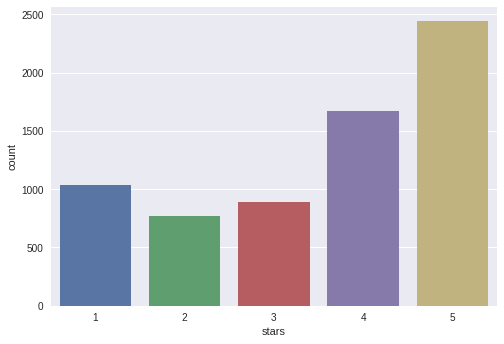

In [21]:
# distribution of star raitings in our dataset 
sns.set(style="darkgrid")
ax = sns.countplot(x="stars", data=data)
plt.savefig('star_dist_bars.png');

**Observations**: 

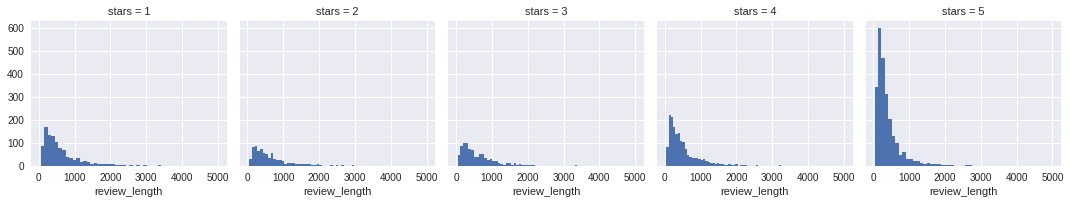

In [22]:
# seeign how review length changed by star raiting 
g = sns.FacetGrid(data=data, col='stars')
g.map(plt.hist, 'review_length', bins=50);
plt.savefig('text_length.png')

**Observations**: 

In [23]:
mask = ["useful", "funny", "cool", "review_length", "sentiment_score", "subjectivity_score", "stars"]

In [24]:
data_feat = data[mask]

In [25]:
stars = data_feat.groupby('stars').mean()
star = stars.corr()
star

,useful,funny,cool,review_length,sentiment_score,subjectivity_score
useful,1.000000,0.961605,-0.538397,0.866061,-0.951446,-0.941843
funny,0.961605,1.000000,-0.316319,0.915865,-0.863595,-0.945833
cool,-0.538397,-0.316319,1.000000,-0.405061,0.719921,0.517221
review_length,0.866061,0.915865,-0.405061,1.000000,-0.848638,-0.979250
sentiment_score,-0.951446,-0.863595,0.719921,-0.848638,1.000000,0.935448
subjectivity_score,-0.941843,-0.945833,0.517221,-0.979250,0.935448,1.000000


/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


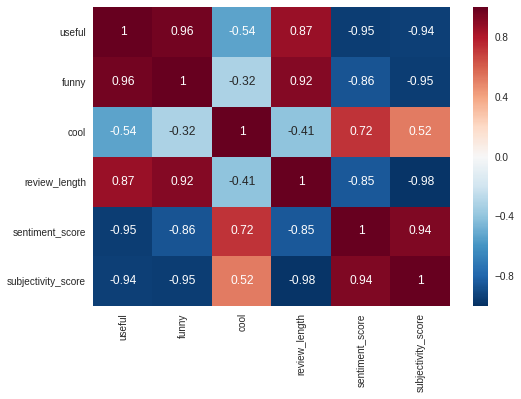

In [26]:
sns.heatmap(data=stars.corr(), annot=True);

/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


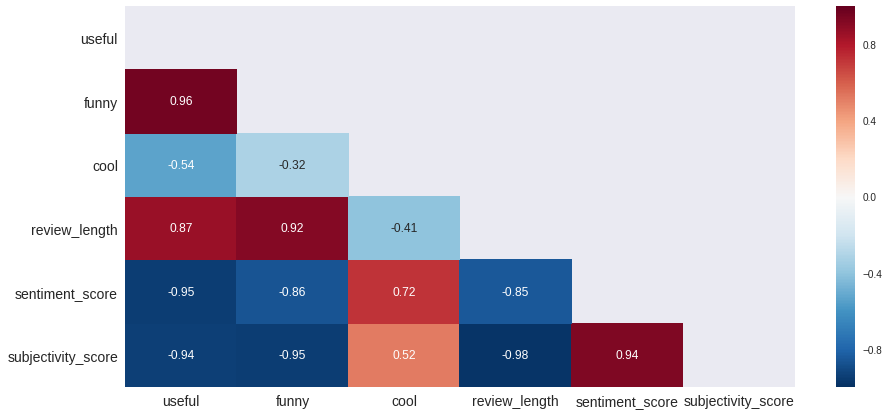

In [27]:
# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(15,7))

# Generates a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(star, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generating our correlation heatmap
ax = sns.heatmap(star, mask=mask, ax=ax, annot = True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show();
plt.savefig('feature_corr.png')

**Observations**:

Things to do
- How sentiment affects stars; that whole criss cross match (stars)
- 

In [28]:
data.head()

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,name,...,latitude,longitude,review_count,is_open,categories,avg_stars,lang,review_length,sentiment_score,subjectivity_score
0,-6e0liTvH5EoB4HuncuQgA,TgDVK5GGEVWqIQB1klOwOQ,Ow07iTOW_JUer07MWNhazg,5,2017-09-02,My husband and I happened to drive by BIG FOOD...,0,0,0,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,910,0.251736,0.488889
1,-6e0liTvH5EoB4HuncuQgA,WsnsRDe7Ywl5FC7bALCBMA,nFS3GfDeOOzg-bXKuNNHsA,5,2017-08-01,First time great food and service will be goin...,0,0,0,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,101,0.360000,0.486667
2,-6e0liTvH5EoB4HuncuQgA,8gkZ2V9YzsM9A3r6Lj9zrQ,M3ncFIlEfaSdSpoiMINwBA,4,2017-06-21,It's a bar. It's small. It's Small Bar! It's c...,1,1,1,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,1832,0.122175,0.463527
3,-6e0liTvH5EoB4HuncuQgA,UyD3TRVYYMCynpkBuR9CcQ,T81BRLNvCpRkgVtYyabImQ,4,2017-09-12,Great little bar in Fort Mill. We went for lun...,0,0,0,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,103,0.103125,0.812500
4,-6e0liTvH5EoB4HuncuQgA,eAsxdJilerKbjmVd2FkDVQ,QKm7NuvVMmvWHKmW7blABg,5,2017-06-22,Small Bar is great! Super cold beer and the p...,0,0,1,"""Small Bar Fort Mill""",...,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0,en,330,0.424427,0.726667


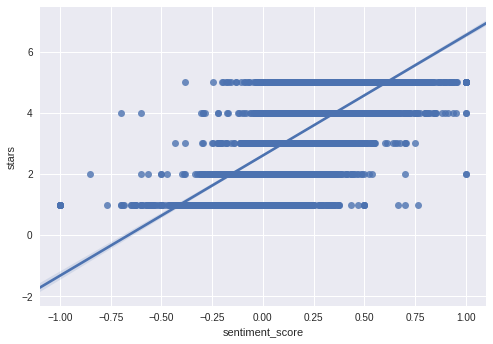

In [29]:
# plotting sentiment score vs stars 
ax = sns.regplot(x="sentiment_score", y="stars", data=data)

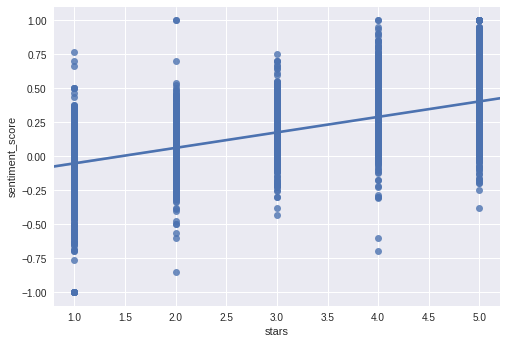

In [30]:
ax = sns.regplot(x="stars", y="sentiment_score", data=data)

/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


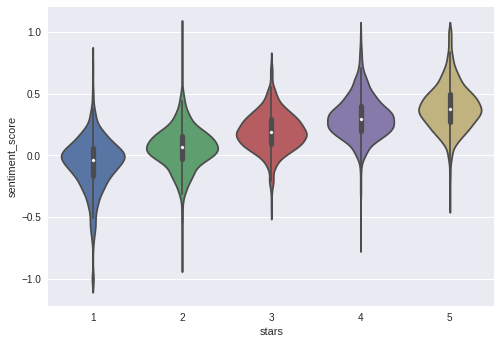

In [31]:
ax = sns.violinplot(x="stars", y="sentiment_score", data=data)

/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


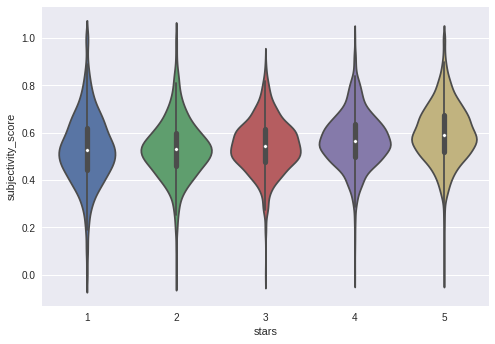

In [32]:
ax = sns.violinplot(x="stars", y="subjectivity_score", data=data)

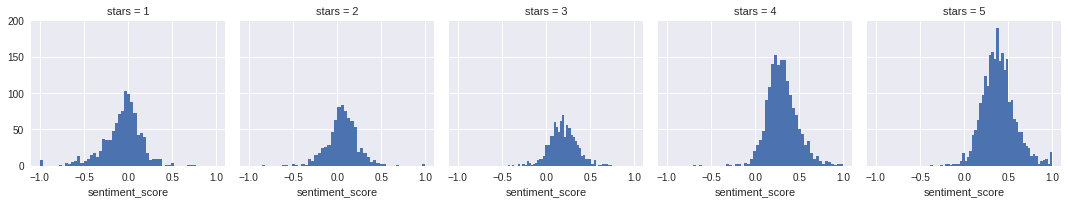

In [33]:
# still checking sentiment score and star raiting
g = sns.FacetGrid(data=data, col='stars')
g.map(plt.hist, 'sentiment_score', bins=50)
plt.savefig('sentiment_stars.png');

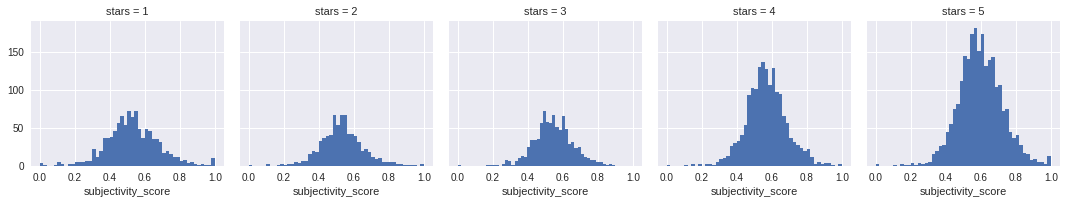

In [34]:
g = sns.FacetGrid(data=data, col='stars')
g.map(plt.hist, 'subjectivity_score', bins=50)
plt.savefig('subjectivity_stars.png')

Let's create a new feature where its 4 stars and above vs under four stars. My reasoning is the following: 
- 4 and above is pretty positive. Indicates a rather good dining experience with little to no qualms 
- 3 and below means that there was something "less than ideal" about the dining experience. It is from this category that we will be able to pull the key patron "pain points" via topic modeling and other methods. 
- This being said, the best way to do this in my opinion is to one hot encode `stars`. That way I still retain that level of filtering should I need it later down the line

In [35]:
# dummies of stars 
dummies = pd.get_dummies(data['stars'])
data = pd.concat([data, dummies], axis=1) 

In [36]:
# creating categorical feature of above or below 4 stars 
data["above_4"] = data["stars"].map(lambda x: 1 if x>3 else 0)

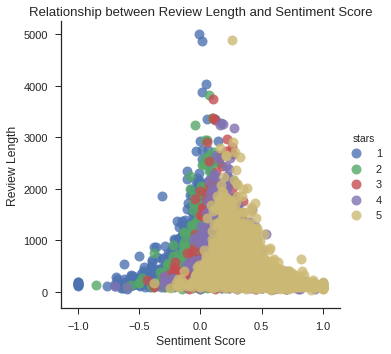

In [37]:
# Setting style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('sentiment_score',
           'review_length', 
           data=data,
           fit_reg=False,
           hue="stars",
           scatter_kws={"marker": "D", 
                        "s": 100}) 

plt.title('Relationship between Review Length and Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Review Length')
plt.savefig('text_lenght_sentiment.png');

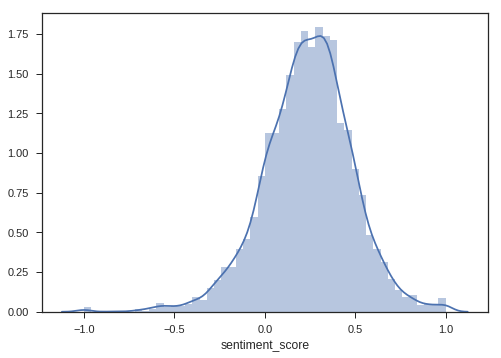

In [38]:
# plotting the distribution of sentiment 
sns.distplot(data["sentiment_score"])
plt.savefig('sent_gen.png');

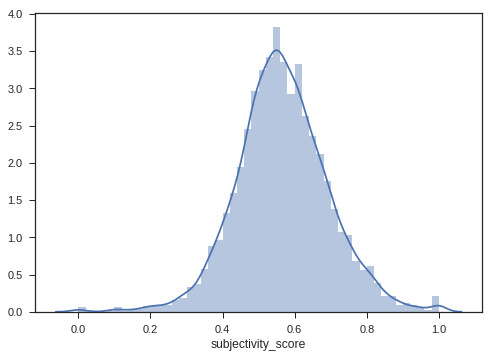

In [39]:
# plotting the distribution of subjectivity 
sns.distplot(data["subjectivity_score"])
plt.savefig('subj_gen.png');

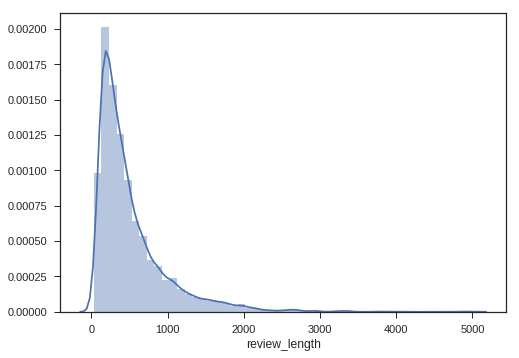

In [40]:
sns.distplot(data["review_length"])
plt.savefig('review_lenght_gen.png');

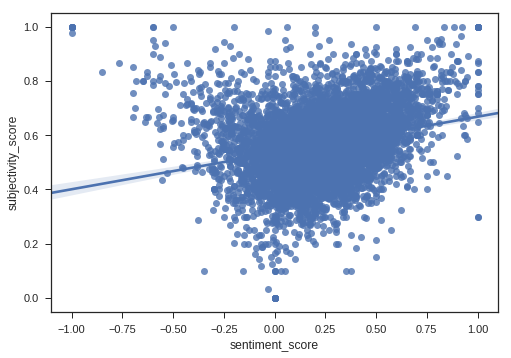

In [41]:
ax = sns.regplot(x="sentiment_score", y="subjectivity_score", data=data)

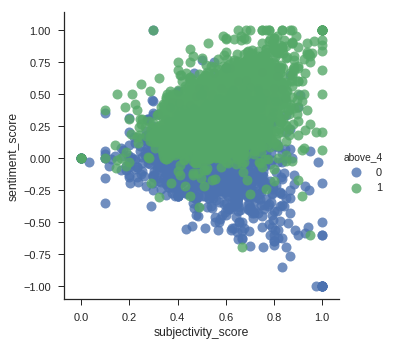

In [42]:
# Setting style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('subjectivity_score',
           'sentiment_score', 
           data=data,
           fit_reg=False,
           hue="above_4",
           scatter_kws={"marker": "D", 
                        "s": 100,
                       #"alpha": 0.5
                       })
plt.savefig('sent_subj.png'); 

## Creating Maps 

- When we get chance, try this out: http://folium.readthedocs.io/en/latest/quickstart.html

## Creating Pos/Neg and Subjective/NotSubjective categorical features

In [43]:
data["pos_sentiment"] = data["sentiment_score"].map(lambda x: 1 if x>=0 else 0)

In [44]:
data["is_subjective"] = data["subjectivity_score"].map(lambda x: 1 if x>=0.5 else 0)

In [45]:
data.head()

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,name,...,sentiment_score,subjectivity_score,1,2,3,4,5,above_4,pos_sentiment,is_subjective
0,-6e0liTvH5EoB4HuncuQgA,TgDVK5GGEVWqIQB1klOwOQ,Ow07iTOW_JUer07MWNhazg,5,2017-09-02,My husband and I happened to drive by BIG FOOD...,0,0,0,"""Small Bar Fort Mill""",...,0.251736,0.488889,0,0,0,0,1,1,1,0
1,-6e0liTvH5EoB4HuncuQgA,WsnsRDe7Ywl5FC7bALCBMA,nFS3GfDeOOzg-bXKuNNHsA,5,2017-08-01,First time great food and service will be goin...,0,0,0,"""Small Bar Fort Mill""",...,0.360000,0.486667,0,0,0,0,1,1,1,0
2,-6e0liTvH5EoB4HuncuQgA,8gkZ2V9YzsM9A3r6Lj9zrQ,M3ncFIlEfaSdSpoiMINwBA,4,2017-06-21,It's a bar. It's small. It's Small Bar! It's c...,1,1,1,"""Small Bar Fort Mill""",...,0.122175,0.463527,0,0,0,1,0,1,1,0
3,-6e0liTvH5EoB4HuncuQgA,UyD3TRVYYMCynpkBuR9CcQ,T81BRLNvCpRkgVtYyabImQ,4,2017-09-12,Great little bar in Fort Mill. We went for lun...,0,0,0,"""Small Bar Fort Mill""",...,0.103125,0.812500,0,0,0,1,0,1,1,1
4,-6e0liTvH5EoB4HuncuQgA,eAsxdJilerKbjmVd2FkDVQ,QKm7NuvVMmvWHKmW7blABg,5,2017-06-22,Small Bar is great! Super cold beer and the p...,0,0,1,"""Small Bar Fort Mill""",...,0.424427,0.726667,0,0,0,0,1,1,1,1


In [46]:
data.columns

Index([       'business_id',          'review_id',            'user_id',
                    'stars',               'date',               'text',
                   'useful',              'funny',               'cool',
                     'name',               'city',              'state',
                 'latitude',          'longitude',       'review_count',
                  'is_open',         'categories',          'avg_stars',
                     'lang',      'review_length',    'sentiment_score',
       'subjectivity_score',                    1,                    2,
                          3,                    4,                    5,
                  'above_4',      'pos_sentiment',      'is_subjective'],
      dtype='object')

## NLP Analysis: 1st pass 

The goal of this section is to explore and better understand what constitutes the different types of reviews.

**Step 1**: Subsection the data into different categories before tokenization and analysis 

In [47]:
# df of reviews with more than 4 stars 
mask = data["above_4"] != 0
above_4_stars = data[mask]

In [48]:
# df of reviews with less than 4 stars 
mask = data["above_4"] != 1
below_4_stars = data[mask]

In [49]:
# df of reviews with positive sentiment in reviews
mask = data["pos_sentiment"] !=0
pos_sentiment = data[mask]

In [50]:
# df of reviews with negative sentiment in reviews
mask = data["pos_sentiment"] !=1
neg_sentiment = data[mask]

In [51]:
# df ofsubjective reviews
mask = data["is_subjective"] !=0
is_subjective = data[mask]

In [52]:
# df of reviews that aren't subjective
mask = data["is_subjective"] !=1
not_subjective = data[mask]

In [53]:
# df of reviews that scored restaurant 1 star
mask = data[1] !=0
one_star = data[mask]

In [54]:
# df of reviews that scored restaurant 5 stars
mask = data[5] !=0
five_stars = data[mask]

**Step 2**: isolate review text from the DataFrames created above 

In [55]:
all_review_text = data["text"]
above_4_stars_text = above_4_stars["text"]
below_4_stars_text = below_4_stars["text"]
pos_sentiment_text = pos_sentiment["text"]
neg_sentiment_text = neg_sentiment["text"]
is_subjective_text = is_subjective["text"]
not_subjective_text = not_subjective["text"]
one_star_text = one_star["text"]
five_stars_text = five_stars["text"]

In [56]:
all_review_text[1]

'First time great food and service will be going back had the hot dogs more food than 1 person can eat'

In [57]:
one_star_text[40]

'Slow service every time, and food has been cold twice. Poorly managed version of this chain. The Rock Hill location is fantastic!'

**Step 3**: Process and clean the review text
Basically were going to clean and tokenize the text so that we can do further NLP analysis on it. 

In [58]:
def process(input_text):
    '''
    Processor function for tokenizing,
    removing stop words, and stemming
    '''
    # Creates a regular expression tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    
    # Creates a Snowball stemmer
    stemmer = SnowballStemmer('english')
    stop_words = stopwords.words('english')
    
    # Tokenizes the input string
    tokens = tokenizer.tokenize(input_text.lower())
    tokens = [x for x in tokens if not x in stop_words]
    
    # Performs stemming on the tokenized words
    tokens_stemmed = [stemmer.stem(x) for x in tokens]
    return tokens_stemmed

In [59]:
# creating tokens based on review text
tokens_all = all_review_text.apply(process)
tokens_above_4 = above_4_stars_text.apply(process)
tokens_below_4 = below_4_stars_text.apply(process)
tokens_pos_sent = pos_sentiment_text.apply(process)
tokens_neg_sent = neg_sentiment_text.apply(process)
tokens_is_subjective = is_subjective_text.apply(process)
tokens_not_sibjective = not_subjective_text.apply(process)
tokens_one_star = one_star_text.apply(process)
tokens_5_stars = five_stars_text.apply(process)

In [60]:
tokens_5_stars

0       [husband, happen, drive, big, food, small, bar...
1       [first, time, great, food, servic, go, back, h...
4       [small, bar, great, super, cold, beer, price, ...
5       [love, place, feel, right, excel, food, reason...
8       [move, fort, mill, past, juli, restaur, sugges...
9       [food, awesom, go, sinc, high, school, best, m...
14      [best, mexican, food, fort, mill, tega, cay, a...
16      [food, came, five, minut, prompt, servic, good...
18      [eat, often, staff, fun, attent, kid, practic,...
28      [use, live, far, definit, miss, start, say, be...
32      [good, bar, foot, good, beer, select, join, be...
42      [heck, yes, follow, know, good, bar, came, fam...
47      [daniel, pleasant, hospit, behind, bar, pleasu...
54      [frequent, mani, locat, still, locat, open, cl...
57      [small, hiccup, begin, visit, quick, forgotten...
63      [came, 4pm, pat, game, hung, around, even, gam...
71      [order, take, coupl, day, ago, readi, time, or...
78      [frenc

In [61]:
tokens_one_star

6       [gone, one, stall, time, awesom, buffalo, chic...
39      [happen, hickori, tavern, reduc, menus, terrib...
40      [slow, servic, everi, time, food, cold, twice,...
44      [went, dinner, monday, night, place, noisi, wa...
45      [waitress, slow, attent, wait, long, time, foo...
48      [takeout, took, 30, minut, 8pm, tuesday, apolo...
51      [servic, slow, took, almost, hour, receiv, app...
53      [poor, servic, sat, hightop, tabl, bar, left, ...
60      [impress, servic, fact, would, say, first, las...
65      [yike, one, worst, restaur, experi, ever, came...
67      [yesterday, 4th, 5th, time, even, though, serv...
74      [worst, custom, servic, ever, last, time, ask,...
80      [call, endless, suppli, bs, place, close, kitc...
81      [bar, absolut, garbag, wait, 30, min, tabl, wa...
84      [never, thought, would, one, peopl, wish, opti...
86      [drink, cheap, servic, suck, wait, one, even, ...
90      [usual, post, review, excel, horribl, experi, ...
93      [food,

In [62]:
analyser = SentimentIntensityAnalyzer()

In [63]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [64]:
print_sentiment_scores(one_star["text"][100])

Someone from here reached out to my dinner group about having an event here.  

The place is in the front of an office park across from Carowinds.  It is a bar with lots of TVs and a couple of pool tables in the back. Each of the booths has its own TV.

When I arrived, I mentioned to the bartender that I was with a dinner group and she had no idea we were going to be there.   Nice to see this was coordinated so well....

The place is not suitable for a large dinner group with only the bar, a few booths and about 5 bar tables.    Thankfully we had a couple of cancellations and were able to pull the bar tables together. 

For food, I tried the fried pickles which are described as "A southern favorite with a little bite".   These were actually some of the worst fried pickles I've ever had.  They were pickle spears cut into chunks and dipped in bread crumbs.  There was no bite to them other than the pickle flavor and the temperature.  

Then I had the rueben which was recommended by the ba

In [65]:
# Creating dictonaries based on the sentence tokens
dict_tokens0 = corpora.Dictionary(tokens_all)
dict_tokens1 = corpora.Dictionary(tokens_above_4)
dict_tokens2 = corpora.Dictionary(tokens_below_4)
dict_tokens3 = corpora.Dictionary(tokens_pos_sent)
dict_tokens4 = corpora.Dictionary(tokens_neg_sent)
dict_tokens5 = corpora.Dictionary(tokens_is_subjective)
dict_tokens6 = corpora.Dictionary(tokens_not_sibjective)
dict_tokens7 = corpora.Dictionary(tokens_one_star)
dict_tokens8 = corpora.Dictionary(tokens_5_stars)

In [66]:
# Creating a document-term matrix for each dictonary 
doc_term_mat0 = [dict_tokens0.doc2bow(token) for token in tokens_all]
doc_term_mat1 = [dict_tokens1.doc2bow(token) for token in tokens_above_4]
doc_term_mat2 = [dict_tokens2.doc2bow(token) for token in tokens_below_4]
doc_term_mat3 = [dict_tokens3.doc2bow(token) for token in tokens_pos_sent]
doc_term_mat4 = [dict_tokens4.doc2bow(token) for token in tokens_neg_sent]
doc_term_mat5 = [dict_tokens5.doc2bow(token) for token in tokens_is_subjective]
doc_term_mat6 = [dict_tokens6.doc2bow(token) for token in tokens_not_sibjective]
doc_term_mat7 = [dict_tokens7.doc2bow(token) for token in tokens_one_star]
doc_term_mat8 = [dict_tokens8.doc2bow(token) for token in tokens_5_stars]

## Modeling and Analysis: Latent Derichlet Allocation 

In [67]:
num_topics = 5

In [68]:
num_words = 5

**All Reviews**

In [69]:
# Generating the LDA model
ldamodel0 = models.ldamodel.LdaModel(doc_term_mat0,
                                    num_topics=num_topics,
                                    id2word=dict_tokens0,
                                    passes=25, alpha=1)

In [70]:
ldamodel0.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.024*"fri" + 0.024*"chicken" + 0.023*"burger" + 0.016*"good" + 0.014*"like"'),
 (1,
  '0.045*"food" + 0.042*"great" + 0.031*"place" + 0.023*"good" + 0.021*"servic"'),
 (2,
  '0.011*"good" + 0.010*"shrimp" + 0.010*"breakfast" + 0.008*"chees" + 0.008*"delici"'),
 (3,
  '0.021*"good" + 0.018*"time" + 0.018*"pizza" + 0.015*"like" + 0.014*"place"'),
 (4,
  '0.023*"order" + 0.016*"food" + 0.014*"wait" + 0.013*"us" + 0.012*"time"')]

In [71]:
num_words = 5
print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for topic_id, tokens in ldamodel0.print_topics(num_topics=num_topics, num_words=num_words):


    print('\nTopic', topic_id)
    print('\nTokens', tokens)
    
# # Print the contributing words along with their relative contributions
# list_of_strings = item[1].split(' + ')
# for text in list_of_strings:
#     weight = text.split('*')[0]
#     word = text.split('*')[1]
#     print(word, '==>', str(round(float(weight) * 100, 2)) + '%')


Top 5 contributing words to each topic:

Topic 0

Tokens 0.024*"fri" + 0.024*"chicken" + 0.023*"burger" + 0.016*"good" + 0.014*"like"

Topic 1

Tokens 0.045*"food" + 0.042*"great" + 0.031*"place" + 0.023*"good" + 0.021*"servic"

Topic 2

Tokens 0.011*"good" + 0.010*"shrimp" + 0.010*"breakfast" + 0.008*"chees" + 0.008*"delici"

Topic 3

Tokens 0.021*"good" + 0.018*"time" + 0.018*"pizza" + 0.015*"like" + 0.014*"place"

Topic 4

Tokens 0.023*"order" + 0.016*"food" + 0.014*"wait" + 0.013*"us" + 0.012*"time"


**Reviews above 4 stars**

In [72]:
# Generating the LDA model
ldamodel1 = models.ldamodel.LdaModel(doc_term_mat1,
                                    num_topics=num_topics,
                                    id2word=dict_tokens1,
                                    passes=25, alpha=1)

In [73]:
ldamodel1.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.014*"food" + 0.012*"like" + 0.012*"mill" + 0.012*"restaur" + 0.011*"fort"'),
 (1,
  '0.032*"burger" + 0.021*"good" + 0.020*"order" + 0.015*"fri" + 0.014*"chees"'),
 (2,
  '0.016*"good" + 0.012*"place" + 0.011*"great" + 0.009*"get" + 0.009*"nice"'),
 (3,
  '0.036*"food" + 0.021*"place" + 0.018*"love" + 0.018*"best" + 0.016*"amaz"'),
 (4,
  '0.039*"great" + 0.031*"food" + 0.029*"good" + 0.020*"servic" + 0.020*"place"')]

In [74]:
num_words = 5
print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for topic_id, tokens in ldamodel1.print_topics(num_topics=num_topics, num_words=num_words):


    print('\nTopic', topic_id)
    print('\nTokens', tokens)


Top 5 contributing words to each topic:

Topic 0

Tokens 0.014*"food" + 0.012*"like" + 0.012*"mill" + 0.012*"restaur" + 0.011*"fort"

Topic 1

Tokens 0.032*"burger" + 0.021*"good" + 0.020*"order" + 0.015*"fri" + 0.014*"chees"

Topic 2

Tokens 0.016*"good" + 0.012*"place" + 0.011*"great" + 0.009*"get" + 0.009*"nice"

Topic 3

Tokens 0.036*"food" + 0.021*"place" + 0.018*"love" + 0.018*"best" + 0.016*"amaz"

Topic 4

Tokens 0.039*"great" + 0.031*"food" + 0.029*"good" + 0.020*"servic" + 0.020*"place"


**Reviews Below 4 stars**

In [75]:
# Generating the LDA model
ldamodel2 = models.ldamodel.LdaModel(doc_term_mat2,
                                    num_topics=num_topics,
                                    id2word=dict_tokens2,
                                    passes=25, alpha=1)

In [76]:
ldamodel2.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.024*"food" + 0.018*"place" + 0.013*"restaur" + 0.011*"like" + 0.011*"good"'),
 (1,
  '0.026*"food" + 0.021*"wait" + 0.017*"tabl" + 0.015*"drink" + 0.014*"servic"'),
 (2,
  '0.023*"good" + 0.014*"chicken" + 0.013*"burger" + 0.012*"like" + 0.012*"fri"'),
 (3,
  '0.013*"get" + 0.012*"food" + 0.011*"place" + 0.011*"time" + 0.010*"like"'),
 (4,
  '0.029*"order" + 0.015*"time" + 0.014*"pizza" + 0.012*"back" + 0.012*"manag"')]

In [77]:
num_words = 5
print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for topic_id, tokens in ldamodel2.print_topics(num_topics=num_topics, num_words=num_words):


    print('\nTopic', topic_id)
    print('\nTokens', tokens)
    


Top 5 contributing words to each topic:

Topic 0

Tokens 0.024*"food" + 0.018*"place" + 0.013*"restaur" + 0.011*"like" + 0.011*"good"

Topic 1

Tokens 0.026*"food" + 0.021*"wait" + 0.017*"tabl" + 0.015*"drink" + 0.014*"servic"

Topic 2

Tokens 0.023*"good" + 0.014*"chicken" + 0.013*"burger" + 0.012*"like" + 0.012*"fri"

Topic 3

Tokens 0.013*"get" + 0.012*"food" + 0.011*"place" + 0.011*"time" + 0.010*"like"

Topic 4

Tokens 0.029*"order" + 0.015*"time" + 0.014*"pizza" + 0.012*"back" + 0.012*"manag"


**Reviews with Positive Sentiment**

In [78]:
# Generating the LDA model
ldamodel3 = models.ldamodel.LdaModel(doc_term_mat3,
                                    num_topics=num_topics,
                                    id2word=dict_tokens3,
                                    passes=25, alpha=1)

In [79]:
ldamodel3.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.026*"order" + 0.014*"food" + 0.014*"wait" + 0.013*"time" + 0.013*"us"'),
 (1,
  '0.023*"place" + 0.015*"good" + 0.015*"food" + 0.014*"bar" + 0.013*"great"'),
 (2,
  '0.023*"fri" + 0.018*"burger" + 0.017*"good" + 0.013*"chicken" + 0.011*"sauc"'),
 (3,
  '0.029*"good" + 0.021*"pizza" + 0.013*"like" + 0.013*"breakfast" + 0.011*"chees"'),
 (4,
  '0.040*"food" + 0.031*"great" + 0.023*"place" + 0.020*"servic" + 0.015*"alway"')]

In [80]:
num_words = 5
print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for topic_id, tokens in ldamodel3.print_topics(num_topics=num_topics, num_words=num_words):


    print('\nTopic', topic_id)
    print('\nTokens', tokens)
    


Top 5 contributing words to each topic:

Topic 0

Tokens 0.026*"order" + 0.014*"food" + 0.014*"wait" + 0.013*"time" + 0.013*"us"

Topic 1

Tokens 0.023*"place" + 0.015*"good" + 0.015*"food" + 0.014*"bar" + 0.013*"great"

Topic 2

Tokens 0.023*"fri" + 0.018*"burger" + 0.017*"good" + 0.013*"chicken" + 0.011*"sauc"

Topic 3

Tokens 0.029*"good" + 0.021*"pizza" + 0.013*"like" + 0.013*"breakfast" + 0.011*"chees"

Topic 4

Tokens 0.040*"food" + 0.031*"great" + 0.023*"place" + 0.020*"servic" + 0.015*"alway"


**Reviews with negative sentiment**

In [81]:
# Generating the LDA model
ldamodel4 = models.ldamodel.LdaModel(doc_term_mat4,
                                    num_topics=num_topics,
                                    id2word=dict_tokens4,
                                    passes=25, alpha=1)

In [82]:
ldamodel4.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.013*"food" + 0.012*"place" + 0.012*"fri" + 0.012*"like" + 0.011*"order"'),
 (1,
  '0.013*"food" + 0.013*"back" + 0.010*"drink" + 0.010*"go" + 0.010*"never"'),
 (2,
  '0.034*"food" + 0.016*"servic" + 0.012*"like" + 0.010*"terribl" + 0.009*"staff"'),
 (3,
  '0.022*"chicken" + 0.011*"place" + 0.011*"order" + 0.010*"back" + 0.009*"food"'),
 (4,
  '0.026*"order" + 0.021*"time" + 0.013*"wait" + 0.012*"minut" + 0.012*"manag"')]

In [83]:
num_words = 5
print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for topic_id, tokens in ldamodel4.print_topics(num_topics=num_topics, num_words=num_words):


    print('\nTopic', topic_id)
    print('\nTokens', tokens)
    


Top 5 contributing words to each topic:

Topic 0

Tokens 0.013*"food" + 0.012*"place" + 0.012*"fri" + 0.012*"like" + 0.011*"order"

Topic 1

Tokens 0.013*"food" + 0.013*"back" + 0.010*"drink" + 0.010*"go" + 0.010*"never"

Topic 2

Tokens 0.034*"food" + 0.016*"servic" + 0.012*"like" + 0.010*"terribl" + 0.009*"staff"

Topic 3

Tokens 0.022*"chicken" + 0.011*"place" + 0.011*"order" + 0.010*"back" + 0.009*"food"

Topic 4

Tokens 0.026*"order" + 0.021*"time" + 0.013*"wait" + 0.012*"minut" + 0.012*"manag"


**Subjective Reviews**

In [84]:
# Generating the LDA model
ldamodel5 = models.ldamodel.LdaModel(doc_term_mat5,
                                    num_topics=num_topics,
                                    id2word=dict_tokens5,
                                    passes=25, alpha=1)

In [85]:
ldamodel5.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.029*"great" + 0.021*"place" + 0.018*"food" + 0.012*"good" + 0.012*"bar"'),
 (1,
  '0.030*"place" + 0.018*"alway" + 0.017*"go" + 0.014*"food" + 0.014*"love"'),
 (2,
  '0.018*"order" + 0.016*"food" + 0.013*"time" + 0.012*"wait" + 0.011*"pizza"'),
 (3,
  '0.021*"chicken" + 0.020*"fri" + 0.018*"good" + 0.017*"like" + 0.017*"order"'),
 (4,
  '0.031*"food" + 0.029*"good" + 0.025*"great" + 0.018*"servic" + 0.017*"delici"')]

In [86]:
num_words = 5
print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for topic_id, tokens in ldamodel5.print_topics(num_topics=num_topics, num_words=num_words):


    print('\nTopic', topic_id)
    print('\nTokens', tokens)
    


Top 5 contributing words to each topic:

Topic 0

Tokens 0.029*"great" + 0.021*"place" + 0.018*"food" + 0.012*"good" + 0.012*"bar"

Topic 1

Tokens 0.030*"place" + 0.018*"alway" + 0.017*"go" + 0.014*"food" + 0.014*"love"

Topic 2

Tokens 0.018*"order" + 0.016*"food" + 0.013*"time" + 0.012*"wait" + 0.011*"pizza"

Topic 3

Tokens 0.021*"chicken" + 0.020*"fri" + 0.018*"good" + 0.017*"like" + 0.017*"order"

Topic 4

Tokens 0.031*"food" + 0.029*"good" + 0.025*"great" + 0.018*"servic" + 0.017*"delici"


**Objective Reviews

In [87]:
# Generating the LDA model
ldamodel6 = models.ldamodel.LdaModel(doc_term_mat6,
                                    num_topics=num_topics,
                                    id2word=dict_tokens6,
                                    passes=25, alpha=1)

In [88]:
ldamodel6.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.023*"order" + 0.014*"time" + 0.013*"back" + 0.011*"go" + 0.010*"wait"'),
 (1,
  '0.019*"good" + 0.011*"place" + 0.011*"pizza" + 0.010*"order" + 0.010*"like"'),
 (2,
  '0.023*"food" + 0.019*"servic" + 0.015*"good" + 0.015*"restaur" + 0.011*"menu"'),
 (3,
  '0.033*"food" + 0.013*"place" + 0.012*"come" + 0.012*"get" + 0.009*"back"'),
 (4,
  '0.011*"good" + 0.010*"great" + 0.010*"best" + 0.009*"place" + 0.008*"fri"')]

In [89]:
num_words = 5
print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for topic_id, tokens in ldamodel6.print_topics(num_topics=num_topics, num_words=num_words):


    print('\nTopic', topic_id)
    print('\nTokens', tokens)
    


Top 5 contributing words to each topic:

Topic 0

Tokens 0.023*"order" + 0.014*"time" + 0.013*"back" + 0.011*"go" + 0.010*"wait"

Topic 1

Tokens 0.019*"good" + 0.011*"place" + 0.011*"pizza" + 0.010*"order" + 0.010*"like"

Topic 2

Tokens 0.023*"food" + 0.019*"servic" + 0.015*"good" + 0.015*"restaur" + 0.011*"menu"

Topic 3

Tokens 0.033*"food" + 0.013*"place" + 0.012*"come" + 0.012*"get" + 0.009*"back"

Topic 4

Tokens 0.011*"good" + 0.010*"great" + 0.010*"best" + 0.009*"place" + 0.008*"fri"


**One Star Reviews**

In [90]:
# Generating the LDA model
ldamodel7 = models.ldamodel.LdaModel(doc_term_mat7,
                                    num_topics=num_topics,
                                    id2word=dict_tokens7,
                                    passes=25, alpha=1)

In [91]:
ldamodel7.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.013*"manag" + 0.013*"order" + 0.013*"place" + 0.012*"servic" + 0.012*"food"'),
 (1,
  '0.021*"food" + 0.014*"like" + 0.014*"burger" + 0.011*"place" + 0.010*"time"'),
 (2,
  '0.019*"us" + 0.017*"order" + 0.014*"wait" + 0.013*"food" + 0.013*"tabl"'),
 (3,
  '0.020*"order" + 0.014*"food" + 0.014*"pizza" + 0.012*"like" + 0.011*"chicken"'),
 (4,
  '0.015*"place" + 0.014*"go" + 0.012*"food" + 0.012*"order" + 0.010*"time"')]

In [92]:
num_words = 5
print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for topic_id, tokens in ldamodel7.print_topics(num_topics=num_topics, num_words=num_words):


    print('\nTopic', topic_id)
    print('\nTokens', tokens)
    


Top 5 contributing words to each topic:

Topic 0

Tokens 0.013*"manag" + 0.013*"order" + 0.013*"place" + 0.012*"servic" + 0.012*"food"

Topic 1

Tokens 0.021*"food" + 0.014*"like" + 0.014*"burger" + 0.011*"place" + 0.010*"time"

Topic 2

Tokens 0.019*"us" + 0.017*"order" + 0.014*"wait" + 0.013*"food" + 0.013*"tabl"

Topic 3

Tokens 0.020*"order" + 0.014*"food" + 0.014*"pizza" + 0.012*"like" + 0.011*"chicken"

Topic 4

Tokens 0.015*"place" + 0.014*"go" + 0.012*"food" + 0.012*"order" + 0.010*"time"


**5 Star Reviews** 

In [93]:
# Generating the LDA model
ldamodel8 = models.ldamodel.LdaModel(doc_term_mat8,
                                    num_topics=num_topics,
                                    id2word=dict_tokens8,
                                    passes=25, alpha=1)

In [94]:
ldamodel8.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.022*"food" + 0.019*"place" + 0.018*"great" + 0.014*"mill" + 0.013*"good"'),
 (1,
  '0.043*"great" + 0.023*"place" + 0.020*"best" + 0.014*"food" + 0.010*"love"'),
 (2,
  '0.019*"chicken" + 0.015*"food" + 0.014*"delici" + 0.013*"fresh" + 0.012*"soup"'),
 (3,
  '0.032*"food" + 0.025*"alway" + 0.021*"servic" + 0.020*"good" + 0.014*"time"'),
 (4,
  '0.020*"burger" + 0.012*"breakfast" + 0.012*"chees" + 0.011*"delici" + 0.010*"order"')]

In [95]:
num_words = 5
print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for topic_id, tokens in ldamodel8.print_topics(num_topics=num_topics, num_words=num_words):


    print('\nTopic', topic_id)
    print('\nTokens', tokens)
    


Top 5 contributing words to each topic:

Topic 0

Tokens 0.022*"food" + 0.019*"place" + 0.018*"great" + 0.014*"mill" + 0.013*"good"

Topic 1

Tokens 0.043*"great" + 0.023*"place" + 0.020*"best" + 0.014*"food" + 0.010*"love"

Topic 2

Tokens 0.019*"chicken" + 0.015*"food" + 0.014*"delici" + 0.013*"fresh" + 0.012*"soup"

Topic 3

Tokens 0.032*"food" + 0.025*"alway" + 0.021*"servic" + 0.020*"good" + 0.014*"time"

Topic 4

Tokens 0.020*"burger" + 0.012*"breakfast" + 0.012*"chees" + 0.011*"delici" + 0.010*"order"


Checking out TFIDF 

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english')
tvec.fit(one_star_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [103]:
pyLDAvis.gensim.prepare(ldamodel0, doc_term_mat0, dict_tokens0)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      28.406900        1       1 -0.189641  0.095168
1      19.701180        1       2  0.171622  0.162944
0      19.123503        1       3  0.021245 -0.196552
3      17.181103        1       4 -0.123544 -0.006830
2      15.587315        1       5  0.120319 -0.054730, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
87    Default  3169.000000      great  3169.000000  30.0000  30.0000
22    Default  5141.000000       food  5141.000000  29.0000  29.0000
26    Default  1547.000000        fri  1547.000000  28.0000  28.0000
238   Default  1542.000000    chicken  1542.000000  27.0000  27.0000
516   Default  1510.000000     burger  1510.000000  26.0000  26.0000
3350  Default  1015.000000      pizza  1015.000000  25.0000  25.0000
172   Default  3832.000000      place  3832.000000  24.0000  24.0000
275   Default  4341.000000       good  4341.000000  23.0000  23.0000
75    Default  1293.000000         us  1293.000000  22.0000  22.0000
142   Default  1497.000000     friend  1497.000000  21.0000  21.0000
90    Default  2559.000000     servic  2559.000000  20.0000  20.0000
224   Default  1073.000000      staff  1073.000000  19.0000  19.0000
201   Default  1483.000000       wait  1483.000000  18.0000  18.0000
50    Default  3386.000000      order  3386.000000  17.0000  17.0000
105   Default  1018.000000      alway  1018.000000  16.0000  16.0000
288   Default   840.000000      minut   840.000000  15.0000  15.0000
368   Default   545.000000     shrimp   545.000000  14.0000  14.0000
232   Default  1266.000000       love  1266.000000  13.0000  13.0000
2     Default   861.000000        bar   861.000000  12.0000  12.0000
578   Default   510.000000  breakfast   510.000000  11.0000  11.0000
163   Default   620.000000       mill   620.000000  10.0000  10.0000
108   Default   970.000000        ask   970.000000   9.0000   9.0000
1972  Default   573.000000      sushi   573.000000   8.0000   8.0000
246   Default   778.000000   sandwich   778.000000   7.0000   7.0000
111   Default   689.000000       beer   689.000000   6.0000   6.0000
59    Default   935.000000       sauc   935.000000   5.0000   5.0000
214   Default   948.000000       area   948.000000   4.0000   4.0000
141   Default   542.000000       fort   542.000000   3.0000   3.0000
91    Default  2789.000000       time  2789.000000   2.0000   2.0000
42    Default   643.000000      manag   643.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
721    Topic5   412.085052    perfect   519.954651   1.6262  -4.8291
521    Topic5   369.034210       fish   462.443024   1.6331  -4.9394
1670   Topic5   136.626129     butter   159.389877   1.7046  -5.9330
11     Topic5   170.401321       chef   211.096436   1.6446  -5.7121
18     Topic5   388.420288       dish   632.306152   1.3714  -4.8882
269    Topic5   359.962769     dinner   699.867920   1.1938  -4.9643
312    Topic5   177.587692     sunday   248.072296   1.5245  -5.6708
16     Topic5   423.561646     delici   967.654846   1.0325  -4.8016
10     Topic5   431.900879      chees  1006.997070   1.0122  -4.7821
57     Topic5   412.139709      salad   994.761902   0.9776  -4.8289
403    Topic5   296.110779       amaz   624.853821   1.1119  -5.1596
25     Topic5   352.119598      fresh   933.398926   0.8839  -4.9863
63     Topic5   289.721802      small   620.906006   1.0965  -5.1814
726    Topic5   233.754898     potato   397.289734   1.3283  -5.3960
35     Topic5   247.566498    husband   462.892059   1.2329  -5.3386
272    Topic5   270.904602    everyth   588.585815   1.0828  -5.2485
211    Topic5   349.805084      lunch  1127.233276   0.6886  -4.9929
324    Topic5   404.867096        tri  1793.245972   0.3705  -4.8467
275    Topic5   563.365662       good  4341.921875  -0.1834 

In [101]:
pyLDAvis.gensim.prepare(ldamodel1, doc_term_mat1, dict_tokens1)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      33.123974        1       1  0.106931  0.025405
3      19.273748        1       2 -0.162319 -0.159376
1      17.713261        1       3  0.164353 -0.051057
4      16.973087        1       4 -0.001834 -0.003541
0      12.915932        1       5 -0.107131  0.188569, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
477   Default  1503.000000     burger  1503.000000  30.0000  30.0000
22    Default  2827.000000       food  2827.000000  29.0000  29.0000
87    Default  2686.000000      great  2686.000000  28.0000  28.0000
232   Default  1051.000000       love  1051.000000  27.0000  27.0000
315   Default   613.000000       amaz   613.000000  26.0000  26.0000
257   Default  2615.000000       good  2615.000000  25.0000  25.0000
246   Default   886.000000       best   886.000000  24.0000  24.0000
10    Default   565.000000      chees   565.000000  23.0000  23.0000
580   Default   442.000000    perfect   442.000000  22.0000  22.0000
180   Default   825.000000    restaur   825.000000  21.0000  21.0000
179   Default   826.000000     realli   826.000000  20.0000  20.0000
82    Default   986.000000       back   986.000000  19.0000  19.0000
163   Default   512.000000       mill   512.000000  18.0000  18.0000
142   Default  1006.000000     friend  1006.000000  17.0000  17.0000
26    Default  1049.000000        fri  1049.000000  16.0000  16.0000
90    Default  1280.000000     servic  1280.000000  15.0000  15.0000
111   Default   528.000000       beer   528.000000  14.0000  14.0000
2708  Default   495.000000      pizza   495.000000  13.0000  13.0000
141   Default   486.000000       fort   486.000000  12.0000  12.0000
4191  Default   238.000000  colombian   238.000000  11.0000  11.0000
91    Default  1227.000000       time  1227.000000  10.0000  10.0000
18    Default   364.000000       dish   364.000000   9.0000   9.0000
50    Default  1229.000000      order  1229.000000   8.0000   8.0000
576   Default   340.000000      local   340.000000   7.0000   7.0000
172   Default  2282.000000      place  2282.000000   6.0000   6.0000
2     Default   477.000000        bar   477.000000   5.0000   5.0000
224   Default   576.000000      staff   576.000000   4.0000   4.0000
657   Default   449.000000    everyth   449.000000   3.0000   3.0000
171   Default   504.000000      owner   504.000000   2.0000   2.0000
493   Default   555.000000        got   555.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
160    Topic5    62.268833       mayb    81.699585   1.7751  -5.8724
665    Topic5   125.909485       need   214.750610   1.5128  -5.1683
805    Topic5    97.354660     someth   159.027176   1.5560  -5.4255
619    Topic5    70.792236     almost   104.052040   1.6616  -5.7441
307    Topic5    90.094994       hous   148.502853   1.5470  -5.5030
527    Topic5   124.175041       wife   243.465790   1.3734  -5.1822
3914   Topic5   109.243568   plantain   204.104202   1.4217  -5.3103
180    Topic5   271.466858    restaur   825.797363   0.9342  -4.4001
369    Topic5   159.715988        new   371.367676   1.2029  -4.9305
357    Topic5   115.216370       rice   232.703903   1.3438  -5.2571
718    Topic5   121.668266   waitress   255.047424   1.3066  -5.2026
108    Topic5   109.218391        ask   214.652725   1.3710  -5.3105
75     Topic5   185.795029         us   523.156128   1.0115  -4.7792
181    Topic5   123.412506     review   269.397095   1.2661  -5.1884
155    Topic5   272.717255       like  1071.545044   0.6783  -4.3955
77     Topic5   151.259933       want   398.376892   1.0783  -4.9849
171    Topic5   154.482651      owner   504.873779   0.8625  -4.9638
266    Topic5   208.341049        one   973.666321   0.5048  -4.6647
244    Topic5   228.873245        tri  1192.961548   0.3957 

In [102]:
pyLDAvis.gensim.prepare(ldamodel2, doc_term_mat2, dict_tokens2)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      26.799932        1       1 -0.141021  0.104681
4      23.044027        1       2  0.141344  0.033964
1      21.407640        1       3  0.113434 -0.065753
3      15.582188        1       4  0.012660  0.059001
0      13.166218        1       5 -0.126416 -0.131893, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
369   Default   906.000000        wait   906.000000  30.0000  30.0000
204   Default   526.000000       drink   526.000000  29.0000  29.0000
2324  Default   555.000000       pizza   555.000000  28.0000  28.0000
165   Default   558.000000      burger   558.000000  27.0000  27.0000
223   Default   716.000000        tabl   716.000000  26.0000  26.0000
6     Default   646.000000     chicken   646.000000  25.0000  25.0000
59    Default  2339.000000        food  2339.000000  24.0000  24.0000
87    Default  2096.000000       order  2096.000000  23.0000  23.0000
377   Default   383.000000         bar   383.000000  22.0000  22.0000
508   Default   502.000000       manag   502.000000  21.0000  21.0000
175   Default   619.000000         fri   619.000000  20.0000  20.0000
307   Default   319.000000      flavor   319.000000  19.0000  19.0000
80    Default   696.000000       minut   696.000000  18.0000  18.0000
62    Default  1647.000000        good  1647.000000  17.0000  17.0000
220   Default   479.000000      server   479.000000  16.0000  16.0000
131   Default   792.000000          us   792.000000  15.0000  15.0000
173   Default   195.000000        fish   195.000000  14.0000  14.0000
438   Default   283.000000        call   283.000000  13.0000  13.0000
101   Default   385.000000        sauc   385.000000  12.0000  12.0000
38    Default   279.000000        beer   279.000000  11.0000  11.0000
479   Default   507.000000        said   507.000000  10.0000  10.0000
96    Default   780.000000     restaur   780.000000   9.0000   9.0000
1540  Default   167.000000       sushi   167.000000   8.0000   8.0000
539   Default   447.000000       price   447.000000   7.0000   7.0000
89    Default  1587.000000       place  1587.000000   6.0000   6.0000
642   Default   299.000000        seat   299.000000   5.0000   5.0000
311   Default  1107.000000         get  1107.000000   4.0000   4.0000
525   Default   206.000000        slow   206.000000   3.0000   3.0000
19    Default   322.000000    sandwich   322.000000   2.0000   2.0000
512   Default   194.000000     qualiti   194.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
9      Topic5    83.035500        fort   138.851044   1.5134  -5.5331
539    Topic5   200.235840       price   447.066437   1.2243  -4.6528
96     Topic5   276.270691     restaur   780.483765   0.9890  -4.3310
15     Topic5    93.211281        mill   176.757904   1.3876  -5.4175
1629   Topic5    32.964455      compar    41.539806   1.7963  -6.4569
291    Topic5    49.771385       decor    76.104706   1.6028  -6.0449
59     Topic5   500.644226        food  2339.238281   0.4858  -3.7364
89     Topic5   368.961945       place  1587.299072   0.5684  -4.0416
355    Topic5    52.833786    standard    85.304901   1.5484  -5.9852
637    Topic5    78.648438        high   163.951050   1.2929  -5.5873
13     Topic5   237.625137        like  1265.848511   0.3547  -4.4816
150    Topic5   128.661301        menu   441.237366   0.7951  -5.0952
671    Topic5    93.479446         kid   245.707291   1.0611  -5.4146
64     Topic5   152.789001       great   676.676697   0.5394  -4.9233
62     Topic5   227.072800        good  1647.431641   0.0458  -4.5271
19     Topic5    99.952492    sandwich   322.143463   0.8572  -5.3476
326    Topic5   112.945312        look   451.719543   0.6414  -5.2254
203    Topic5    92.007309  disappoint   296.583496   0.8571  -5.4305
233    To

In [104]:
pyLDAvis.gensim.prepare(ldamodel3, doc_term_mat3, dict_tokens3)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      26.162395        1       1 -0.195693 -0.090641
2      20.175310        1       2  0.142732 -0.072747
1      19.532793        1       3 -0.122872  0.084035
4      19.041588        1       4  0.073052  0.174408
3      15.087914        1       5  0.102781 -0.095055, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
26    Default  1359.000000        fri  1359.000000  30.0000  30.0000
3095  Default   985.000000      pizza   985.000000  29.0000  29.0000
87    Default  3116.000000      great  3116.000000  28.0000  28.0000
50    Default  2687.000000      order  2687.000000  27.0000  27.0000
22    Default  4431.000000       food  4431.000000  26.0000  26.0000
505   Default  1207.000000     burger  1207.000000  25.0000  25.0000
2     Default   795.000000        bar   795.000000  24.0000  24.0000
172   Default  3382.000000      place  3382.000000  23.0000  23.0000
75    Default   993.000000         us   993.000000  22.0000  22.0000
567   Default   548.000000  breakfast   548.000000  21.0000  21.0000
262   Default  4059.000000       good  4059.000000  20.0000  20.0000
111   Default   626.000000       beer   626.000000  19.0000  19.0000
10    Default   901.000000      chees   901.000000  18.0000  18.0000
105   Default   984.000000      alway   984.000000  17.0000  17.0000
201   Default  1132.000000       wait  1132.000000  16.0000  16.0000
108   Default   750.000000        ask   750.000000  15.0000  15.0000
232   Default  1245.000000       love  1245.000000  14.0000  14.0000
250   Default  1140.000000    chicken  1140.000000  13.0000  13.0000
1804  Default   507.000000      sushi   507.000000  12.0000  12.0000
275   Default   611.000000      minut   611.000000  11.0000  11.0000
59    Default   844.000000       sauc   844.000000  10.0000  10.0000
90    Default  2128.000000     servic  2128.000000   9.0000   9.0000
581   Default   387.000000        egg   387.000000   8.0000   8.0000
328   Default  1078.000000       best  1078.000000   7.0000   7.0000
425   Default   735.000000     flavor   735.000000   6.0000   6.0000
315   Default   531.000000   waitress   531.000000   5.0000   5.0000
1014  Default   417.000000        bbq   417.000000   4.0000   4.0000
176   Default   954.000000      price   954.000000   3.0000   3.0000
357   Default   517.000000     shrimp   517.000000   2.0000   2.0000
70    Default   960.000000       tabl   960.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
397    Topic5   141.288239      cream   166.225372   1.7287  -5.7067
222    Topic5   113.266060    lobster   130.926605   1.7464  -5.9277
1136   Topic5   227.706070       grit   296.908875   1.6259  -5.2294
2034   Topic5    88.596214       morn   100.987106   1.7604  -6.1734
251    Topic5   185.516815       chip   246.901093   1.6054  -5.4343
320    Topic5   264.591888       fast   399.910187   1.4782  -5.0793
1515   Topic5   104.296692     sausag   128.779022   1.6804  -6.0102
10     Topic5   482.192963      chees   901.709290   1.2653  -4.4791
285    Topic5   266.024963      quick   459.265442   1.3452  -5.0739
88     Topic5   258.416138        hot   448.386536   1.3402  -5.1029
262    Topic5  1238.574219       good  4059.395264   0.7042  -3.5357
865    Topic5   127.883377        ice   174.151169   1.5825  -5.8063
155    Topic5   558.531982       like  1994.608154   0.6184  -4.3321
211    Topic5   324.317474      lunch   998.149902   0.7671  -4.8757
197    Topic5   283.554840       tast   792.436279   0.8636  -5.0100
263    Topic5   336.913666        got  1089.230835   0.7179  -4.8376
179    Topic5   369.308441     realli  1297.417236   0.6348  -4.7458
25     Topic5   283.714539      fresh   884.187439   0.7546  -5.0095
50     Topic5   481.827179      order  2687.004883   0.1727 

In [106]:
# ldamodel.print_topics(num_topics=num_topics, num_words=num_words)

In [107]:
# num_words = 5
# print('\nTop ' + str(num_words) + ' contributing words to each topic:')
# for topic_id, tokens in ldamodel.print_topics(num_topics=num_topics, num_words=num_words):


#     print('\nTopic', topic_id)
#     print('\nTokens', tokens)
    
# # Print the contributing words along with their relative contributions
# list_of_strings = item[1].split(' + ')
# for text in list_of_strings:
#     weight = text.split('*')[0]
#     word = text.split('*')[1]
#     print(word, '==>', str(round(float(weight) * 100, 2)) + '%')

In [109]:
# vader = SentimentIntensityAnalyzer()
# print(vader.polarity_scores(review_text[100]))
# # turn it to dataframe and then concatenate ?

In [110]:
blob = TextBlob(data["text"][0])

In [111]:
blob.tags

[('My', 'PRP$'),
 ('husband', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('happened', 'VBD'),
 ('to', 'TO'),
 ('drive', 'VB'),
 ('by', 'IN'),
 ('BIG', 'NNP'),
 ('FOOD', 'NNP'),
 ('Small', 'NNP'),
 ('Bar', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('name', 'NN'),
 ('intrigued', 'VBD'),
 ('us', 'PRP'),
 ('We', 'PRP'),
 ('were', 'VBD'),
 ('greeted', 'VBN'),
 ('by', 'IN'),
 ('Tara', 'NNP'),
 ('bartender', 'NN'),
 ('and', 'CC'),
 ('Sadat', 'NNP'),
 ('chef\\/manager', 'NN'),
 ('and', 'CC'),
 ('we', 'PRP'),
 ('grabbed', 'VBD'),
 ('a', 'DT'),
 ('table', 'JJ'),
 ('inside', 'NN'),
 ('to', 'TO'),
 ('watch', 'VB'),
 ('football', 'NN'),
 ('There', 'EX'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('patio', 'NN'),
 ('outside', 'IN'),
 ('which', 'WDT'),
 ('looks', 'VBZ'),
 ('charming', 'VBG'),
 ('but', 'CC'),
 ('we', 'PRP'),
 ('wanted', 'VBD'),
 ('A\\/C', 'NNP'),
 ('and', 'CC'),
 ('TV', 'NN'),
 ('which', 'WDT'),
 ('we', 'PRP'),
 ('had', 'VBD'),
 ('in', 'IN'),
 ('abundance', 'NN'),
 ('Tara', 'NNP'),
 ('provided', 'VBD

In [112]:
blob.noun_phrases

WordList(['big food small', 'tara', 'sadat', 'a\\/c', 'tara', 'vodka soda', 'omb', 'hubby', 'dessert nachos', 'crispy sqeeks', 'cheese curds', 's.m.a.l.l', 'sauce', 'green onions', 'sooo', 'picture shows', 'fresh mozzarella cheese', 'crispy batter', 'fried'])

In [114]:
# seperate out good and bad
# 3 filter out negative ordinals 

# look into taking average of text blobs 

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

-0.125
0.0
0.35
0.0
0.5
0.0
0.0
0.07499999999999998
0.0
0.17777777777777778
0.0
0.75


## Stating with the Basics

In [ ]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(data["text"], y, test_size=0.30, random_state=42)

#### Bag of Words Model
Here, we will create a bag of words model to get a better sense of our data. What words are hot, whats not ext... 

In [ ]:
X_train.head

In [ ]:
# instantiaing CountVectorizer 
cvec = CountVectorizer(stop_words='english') # should I be setting max_df

# making our corpus 
corpus = data["text"]

In [ ]:
cvec.fit(corpus)

# tansforming corpus 
new_corpus = cvec.transform(corpus)

In [ ]:
new_corpus

In [ ]:
new_corpus.todense()

In [ ]:
cvec.get_feature_names()

In [ ]:
# X_train = pd.DataFrame(cvec.transform(data["text"]).todense(),
#                        columns=cvec.get_feature_names())

In [ ]:
word_counts = X_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

In [ ]:
y_train = data["stars"]

In [ ]:
# closer look at the most common words

# Recommender System Based on Sentiment Score 

In [115]:
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

In [116]:
data.head()

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,name,...,sentiment_score,subjectivity_score,1,2,3,4,5,above_4,pos_sentiment,is_subjective
0,-6e0liTvH5EoB4HuncuQgA,TgDVK5GGEVWqIQB1klOwOQ,Ow07iTOW_JUer07MWNhazg,5,2017-09-02,My husband and I happened to drive by BIG FOOD...,0,0,0,"""Small Bar Fort Mill""",...,0.251736,0.488889,0,0,0,0,1,1,1,0
1,-6e0liTvH5EoB4HuncuQgA,WsnsRDe7Ywl5FC7bALCBMA,nFS3GfDeOOzg-bXKuNNHsA,5,2017-08-01,First time great food and service will be goin...,0,0,0,"""Small Bar Fort Mill""",...,0.360000,0.486667,0,0,0,0,1,1,1,0
2,-6e0liTvH5EoB4HuncuQgA,8gkZ2V9YzsM9A3r6Lj9zrQ,M3ncFIlEfaSdSpoiMINwBA,4,2017-06-21,It's a bar. It's small. It's Small Bar! It's c...,1,1,1,"""Small Bar Fort Mill""",...,0.122175,0.463527,0,0,0,1,0,1,1,0
3,-6e0liTvH5EoB4HuncuQgA,UyD3TRVYYMCynpkBuR9CcQ,T81BRLNvCpRkgVtYyabImQ,4,2017-09-12,Great little bar in Fort Mill. We went for lun...,0,0,0,"""Small Bar Fort Mill""",...,0.103125,0.812500,0,0,0,1,0,1,1,1
4,-6e0liTvH5EoB4HuncuQgA,eAsxdJilerKbjmVd2FkDVQ,QKm7NuvVMmvWHKmW7blABg,5,2017-06-22,Small Bar is great! Super cold beer and the p...,0,0,1,"""Small Bar Fort Mill""",...,0.424427,0.726667,0,0,0,0,1,1,1,1


In [117]:
data.columns

Index([       'business_id',          'review_id',            'user_id',
                    'stars',               'date',               'text',
                   'useful',              'funny',               'cool',
                     'name',               'city',              'state',
                 'latitude',          'longitude',       'review_count',
                  'is_open',         'categories',          'avg_stars',
                     'lang',      'review_length',    'sentiment_score',
       'subjectivity_score',                    1,                    2,
                          3,                    4,                    5,
                  'above_4',      'pos_sentiment',      'is_subjective'],
      dtype='object')

In [118]:
# pure rec dataframe 
rec_data = data[["business_id", "name", "user_id", "sentiment_score"]]

In [119]:
rec_data.head()

,business_id,name,user_id,sentiment_score
0,-6e0liTvH5EoB4HuncuQgA,"""Small Bar Fort Mill""",Ow07iTOW_JUer07MWNhazg,0.251736
1,-6e0liTvH5EoB4HuncuQgA,"""Small Bar Fort Mill""",nFS3GfDeOOzg-bXKuNNHsA,0.360000
2,-6e0liTvH5EoB4HuncuQgA,"""Small Bar Fort Mill""",M3ncFIlEfaSdSpoiMINwBA,0.122175
3,-6e0liTvH5EoB4HuncuQgA,"""Small Bar Fort Mill""",T81BRLNvCpRkgVtYyabImQ,0.103125
4,-6e0liTvH5EoB4HuncuQgA,"""Small Bar Fort Mill""",QKm7NuvVMmvWHKmW7blABg,0.424427


In [130]:
rec_data.to_csv("sent_rec_data", encoding='utf-8', index=False)

In [120]:
# need an index of all users, and single column for every restaurant 
pivot = pd.pivot_table(rec_data, index='user_id', columns='name', values='sentiment_score')

In [121]:
pivot.head()

name,"""521 BBQ & Grill""","""Akahana - Asian Bistro, Bar & Sushi""","""American Cafe & Lounge""","""Angelos of Fort Mill""","""Arby's""","""Archie Boy's BBQ""","""Asian Express""","""Asian Roll & Grill""","""Bacintyme Coffee Cafe""","""Bagel Boat""",...,"""Trifecta Grill""","""Tropical Smoothie Cafe""","""Twin Rivers""","""Village Pizza""","""Waffle House""","""Wendy's""","""Wing King Cafe""","""WingBonz""","""Zaxby's Chicken Fingers & Buffalo Wings""","""Ziggy's Grille House"""
user_id,,,,,,,,,,,,,,,,,,,,,
--44NNdtngXMzsxyN7ju6Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--RNUEvgFSw-b-hhhgZzSg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0b84SUGVN0YkG5j2MCmBw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1FEXqwQSerk4L7Vrdodgg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29I2dtVmCaHZNCvUnCZGg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.370383,NaN,NaN,NaN


In [122]:
# item based colaborative filter, so we transpose, and create a sparse dataframe 
sparse_pivot = sparse.csr_matrix(pivot.T.fillna(0))

In [123]:
# print(sparse_pivot)

### Calculating Cosine Similarity 

In [124]:
sparse_pivot.shape

(183, 3899)

In [125]:
distances = pairwise_distances(sparse_pivot, metric='cosine')

In [126]:
distances.shape

(183, 183)

In [127]:
distance_df = pd.DataFrame(distances, index=pivot.columns, columns=pivot.columns)
distance_df.head()

name,"""521 BBQ & Grill""","""Akahana - Asian Bistro, Bar & Sushi""","""American Cafe & Lounge""","""Angelos of Fort Mill""","""Arby's""","""Archie Boy's BBQ""","""Asian Express""","""Asian Roll & Grill""","""Bacintyme Coffee Cafe""","""Bagel Boat""",...,"""Trifecta Grill""","""Tropical Smoothie Cafe""","""Twin Rivers""","""Village Pizza""","""Waffle House""","""Wendy's""","""Wing King Cafe""","""WingBonz""","""Zaxby's Chicken Fingers & Buffalo Wings""","""Ziggy's Grille House"""
name,,,,,,,,,,,,,,,,,,,,,
"""521 BBQ & Grill""",0.000000,0.937445,0.994280,1.0,1.0,1.0,1.000000,0.985077,1.0,1.0,...,1.002666,0.961410,1.0036,0.998607,0.929326,1.003391,0.968368,0.989331,1.015148,1.0
"""Akahana - Asian Bistro, Bar & Sushi""",0.937445,0.000000,1.001264,1.0,1.0,1.0,0.968985,0.937009,1.0,1.0,...,1.000000,0.986933,1.0000,0.976620,1.000000,1.038207,0.980848,1.000000,1.006127,1.0
"""American Cafe & Lounge""",0.994280,1.001264,0.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.0000,0.940487,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
"""Angelos of Fort Mill""",1.000000,1.000000,1.000000,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
"""Arby's""",1.000000,1.000000,1.000000,1.0,0.0,1.0,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [128]:
search = '"Angelos of Fort Mill"'
for resto in rec_data.loc[rec_data['name'].str.contains(search), 'name'].values:
    print(resto)
    print('Average Sentiment', pivot[resto].mean())
    print('Count of Sentiment Scores', pivot[resto].count())
    print('Similar Restaurants')
    print(distance_df[resto].sort_values()[1:11])
    print('')
    print('')

"Angelos of Fort Mill"
Average Sentiment 0.6705833333333333
Count of Sentiment Scores 4
Similar Restaurants
name
"The Shore Club"                 0.766875
"De Marco's Italian Grill"       0.892939
"McDonald's"                     0.948081
"521 BBQ & Grill"                1.000000
"Papa Murphy's"                  1.000000
"Papa Pino's"                    1.000000
"Pasquale's Restaurant & Pub"    1.000000
"Passion8 Bistro"                1.000000
"Patriot Taphouse and Grill"     1.000000
"Peking Tokyo"                   1.000000
Name: "Angelos of Fort Mill", dtype: float64


"Angelos of Fort Mill"
Average Sentiment 0.6705833333333333
Count of Sentiment Scores 4
Similar Restaurants
name
"The Shore Club"                 0.766875
"De Marco's Italian Grill"       0.892939
"McDonald's"                     0.948081
"521 BBQ & Grill"                1.000000
"Papa Murphy's"                  1.000000
"Papa Pino's"                    1.000000
"Pasquale's Restaurant & Pub"    1.000000
"Passion8 Bis